In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Replace this with the path to your folder containing the PNG images
image_folder = r'D:\research project\B_1'

In [4]:
# Wavelengths in nanometers corresponding to each band
wavelengths = [
    887.46, 892.32, 897.18, 902.04, 906.9, 911.76, 916.63, 921.49,
    926.36, 931.23, 936.11, 940.98, 945.86, 950.74, 955.62, 960.5,
    965.38, 970.27, 975.16, 980.05, 984.94, 989.83, 994.73, 999.63,
    1004.53, 1009.43, 1014.33, 1019.24, 1024.15, 1029.06, 1033.97,
    1038.88, 1043.8, 1048.71, 1053.63, 1058.55, 1063.48, 1068.4,
    1073.33, 1078.26, 1083.19, 1088.12, 1093.06, 1097.99, 1102.93,
    1107.87, 1112.81, 1117.76, 1122.7, 1127.65, 1132.6, 1137.55,
    1142.51, 1147.46, 1152.42, 1157.38, 1162.34, 1167.31, 1172.27,
    1177.24, 1182.21, 1187.18, 1192.15, 1197.13, 1202.1, 1207.08,
    1212.06, 1217.05, 1222.03, 1227.02, 1232.01, 1237.0, 1241.99,
    1246.98, 1251.98, 1256.98, 1261.98, 1266.98, 1271.98, 1276.99,
    1282.0, 1287.01, 1292.02, 1297.03, 1302.05, 1307.07, 1312.09,
    1317.11, 1322.13, 1327.16, 1332.18, 1337.21, 1342.24, 1347.28,
    1352.31, 1357.35, 1362.39, 1367.43, 1372.47, 1377.51, 1382.56,
    1387.61, 1392.66, 1397.71, 1402.76, 1407.82, 1412.88, 1417.94,
    1423.0, 1428.06, 1433.13, 1438.2, 1443.27, 1448.34, 1453.41,
    1458.49, 1463.56, 1468.64, 1473.72, 1478.81, 1483.89, 1488.98,
    1494.07, 1499.16, 1504.25, 1509.35, 1514.44, 1519.54, 1524.64,
    1529.74, 1534.85, 1539.95, 1545.06, 1550.17, 1555.28, 1560.4,
    1565.51, 1570.63, 1575.75, 1580.87, 1586.0, 1591.12, 1596.25,
    1601.38, 1606.51, 1611.64, 1616.78, 1621.91, 1627.05, 1632.19,
    1637.34, 1642.48, 1647.63, 1652.78, 1657.93, 1663.08, 1668.23,
    1673.39, 1678.55, 1683.71, 1688.87, 1694.04, 1699.2, 1704.37,
    1709.54, 1714.71, 1719.88, 1725.06
]

# Ensure that the number of wavelengths matches the number of bands
assert len(wavelengths) == 168, "There should be exactly 168 wavelengths."


In [14]:
# Initialize a list to store mean reflectance values
mean_reflectance = []

# List all PNG files in the directory and sort them
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')],
                     key=lambda x: int(''.join(filter(str.isdigit, x))))

# Check if there are exactly 168 images
assert len(image_files) == 168, f"Expected 168 images, found {len(image_files)}."

# Iterate through each image and compute the mean reflectance
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    with Image.open(img_path) as img:
        # Convert image to grayscale (if not already)
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        
        # Normalize pixel values if necessary (assuming reflectance is scaled 0-255)
        reflectance = img_array / 255.0  # Scale to 0-1
        
        # Compute mean reflectance for the current band
        mean_val = np.mean(reflectance)
        mean_reflectance.append(mean_val)

# Convert to numpy arrays for easier handling
wavelengths = np.array(wavelengths)
mean_reflectance = np.array(mean_reflectance)


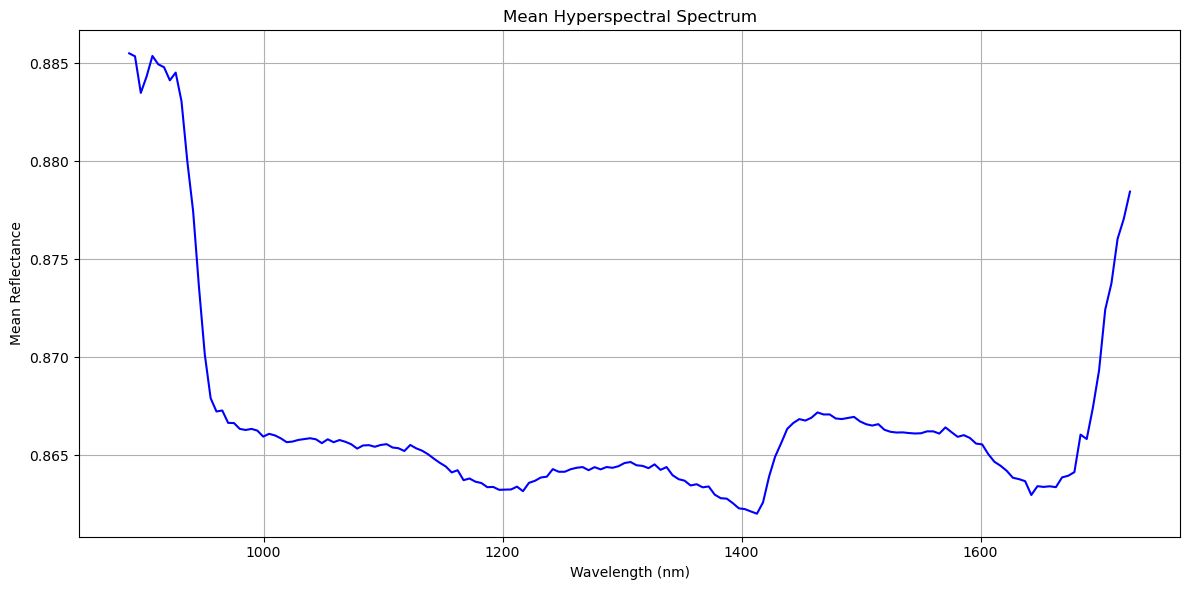

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, mean_reflectance, color='blue', linewidth=1.5)
plt.title('Mean Hyperspectral Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Mean Reflectance')
plt.grid(True)
plt.tight_layout()
plt.show()

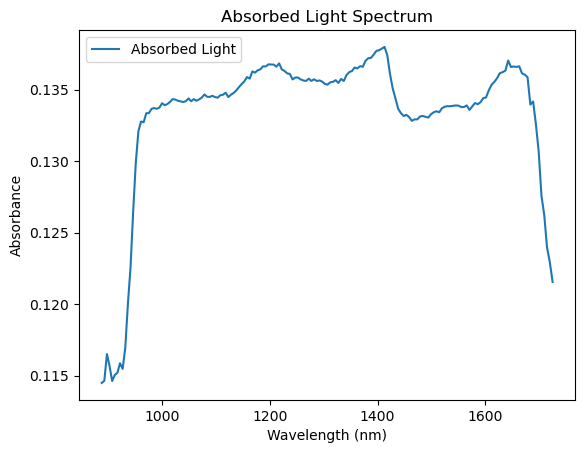

In [16]:

# Calculate absorbed light
absorbance = 1 - mean_reflectance

# Plot the absorbed light
plt.plot(wavelengths, absorbance, label='Absorbed Light')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorbed Light Spectrum')
plt.legend()
plt.show()